<a href="https://colab.research.google.com/github/oweskhan77/Eda-on-Hotel-booking-Analysis/blob/main/Eda_on_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

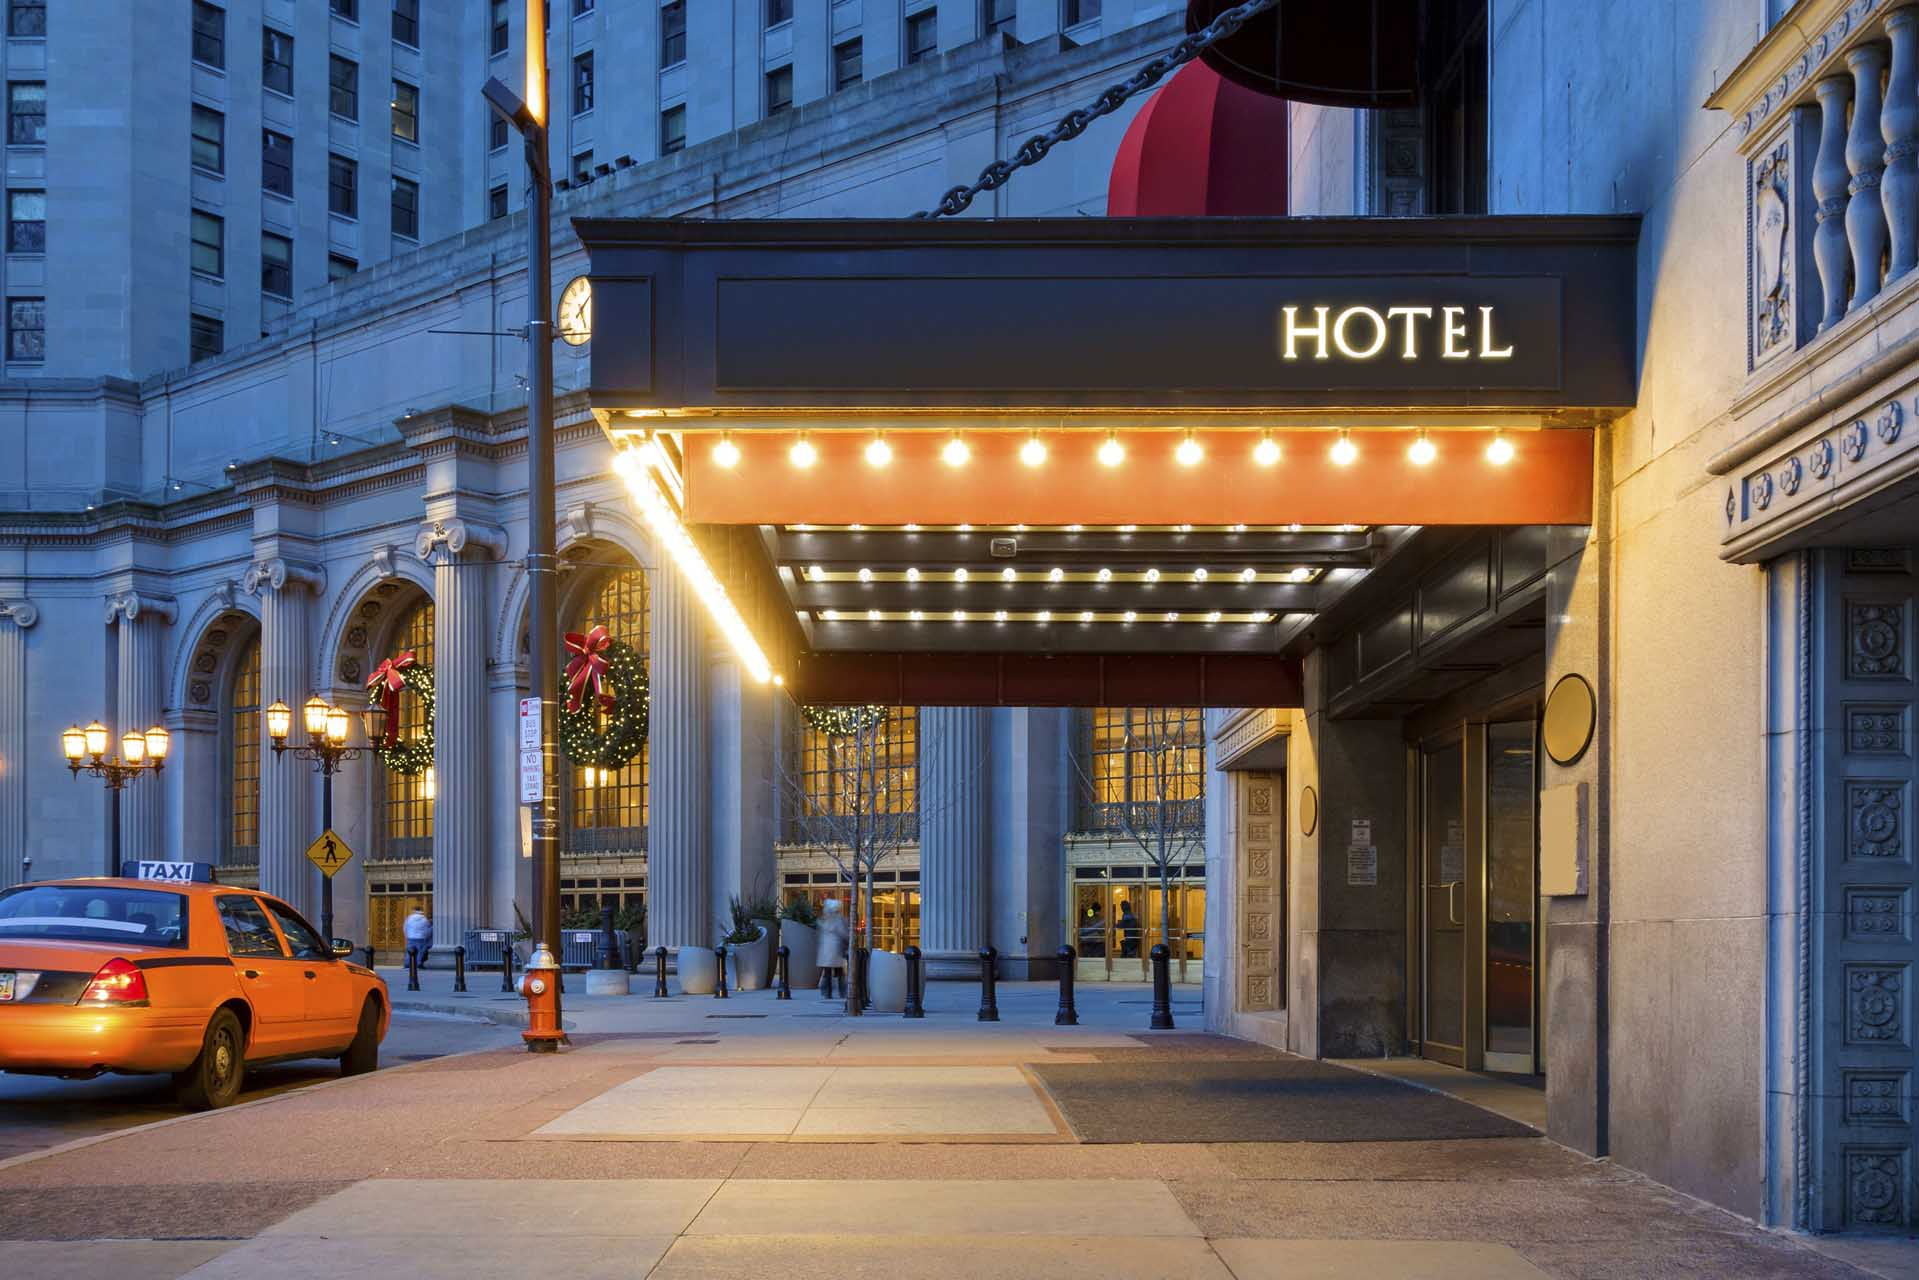

In [ ]:
#adding image to colab
Image('hotel.jpg',width=1080,height=720)


In [ ]:
uploaded=files.upload()

Saving hotel.jpg to hotel.jpg


In [ ]:
from google.colab import files
from IPython.display import Image

# Importing all essential python libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Mounting Drive

In [ ]:
#mounting drive in colab
from google.colab import drive                   
drive.mount('/content/drive')                 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Path of csv data file 

In [ ]:
#Defining path of csv file from drive
path='/content/drive/MyDrive/Almabetter/PROJECTS/EDA HOTEL BOOKING ANALYSIS/ Hotel Bookings.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing and Inspection the Data

In [ ]:
#importing  data using pd
hotel=pd.read_csv(path)

#make copy of dataftame
df=hotel.copy()

#looking top 5 rows of dataframe
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


###Understandig the  meaning of columns for better exploration, we will see the unique values attained by each column whose meaning we are unable to understand.

In [ ]:
df.columns                 #checking the names of colummns in dataframe

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['is_repeated_guest'].unique()

array([0, 1])

# Let's look at the statistical aspects of the dataframes df

In [ ]:
#understanding numerical data wiith some values as count,mean,min,max..etc.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#checking datatypes

In [ ]:
#getting all the information of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  int64  

###Creating list of continous and categorical data

In [ ]:
# creating numerical and categorical dataframes
con_cols=[col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64'or df[col].dtype == '<M8[ns]')]  #df['reservation_status_date'].dtpye() --->    dtype('<M8[ns]')

cat_cols =[col for col in df.columns if df[col].dtype == 'O']

print(f'Continous columns:-',con_cols,'\n')
print(f'Categorical columns:-',cat_cols,'\n')
print(f'there are continous columnsand:-',{len(con_cols)},'and categorical columns are',{len(cat_cols)})

Continous columns:- ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'total_stay', 'total_people'] 

Categorical columns:- ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'] 

there are continous columnsand:- {23} and categorical columns are {11}


### The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

#Feature Engneering or Cleaning the data
Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

Cleaning data is important step before EDA as it will remove the unwanted data that can affect the outcome of  our EDA.

While cleaning data we will perform following steps: \ 1) Deleting duplicate rows \ 2) Handling missing values. \ 3) Convert columns to appropriate datatypes. \ 4) Adding important columns

##Step 1: Removing duplicate rows if any present :-

In [ ]:
df[df.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows


(31994, 32)

In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

##Step2: Handling missing values.

In [ ]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:6]

hotel                   0
days_in_waiting_list    0
reserved_room_type      0
assigned_room_type      0
booking_changes         0
deposit_type            0
dtype: int64

####Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns



In [ ]:
df[['company','agent']] = df[['company','agent']].fillna(0)

####This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [ ]:
df['children'].fillna(df['children'].mean(), inplace = True)

####Next column with missing value is 'country'. This column represents the country of customer. \ Since, this column has datatype of string. We will replace the missing value with the 'others'.

In [ ]:
df['country'].fillna('others', inplace = True)

###checking percentage of null values in each column

In [ ]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

###Step 3: Converting columns to appropriate datatypes.

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

###Step 4: Adding some  important columns for better exploration.

In [ ]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

In [ ]:
# droppping all 166 those rows in which total_pepole is 0. That simply means  no bookings were made.
df.drop(df[df['total_people']==0].index,inplace=True)

### Now all null values are removed  and data is better for Exploration.

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [ ]:
#Dataframe df2 where cancellation of booking =0 means confermed the
df2=df[df['is_canceled']==0]


#EDA - Exploratory Data Analysis

##Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

##Q1]Which type of hotels is mostly preferd by the guest?

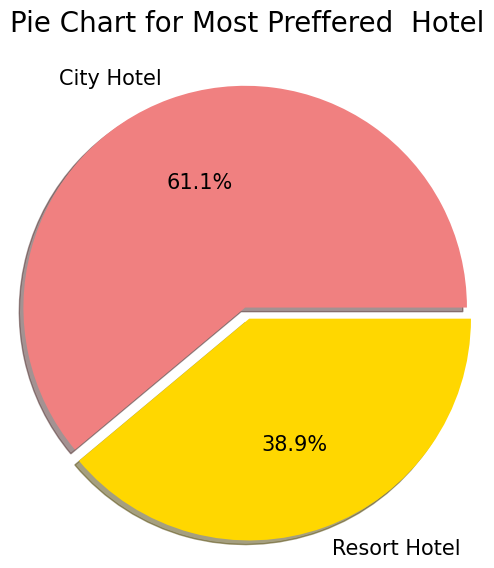

In [ ]:
plt.pie(df['hotel'].value_counts(),labels=df['hotel'].value_counts().index.tolist(),explode=[0.04, 0.04], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart for Most Preffered  Hotel',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings which is 61.07%.

###Q2) which hotel seems to make more revenue?

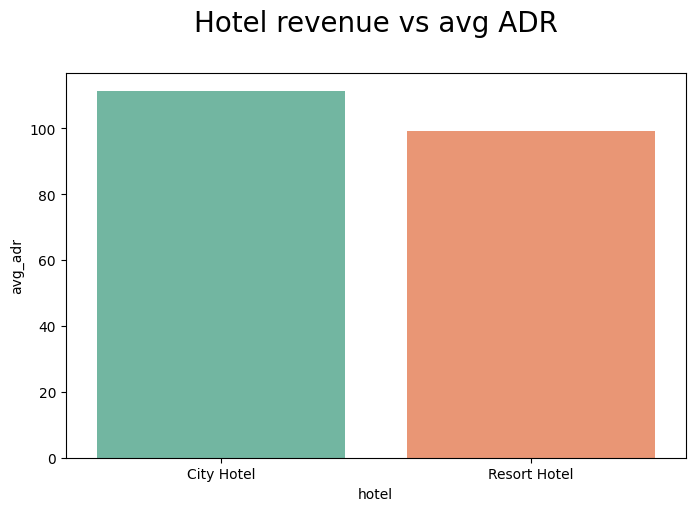

In [ ]:
d3 =df.groupby('hotel')['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr with np.mean
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'],palette='Set2')
plt.title('Hotel revenue vs avg ADR',loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observations:-
Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

###Q3]Which Agent made the most bookings?

In [ ]:
# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most Bookings count" }).sort_values(by='Most Bookings count',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

#top_ten_highest_bookings

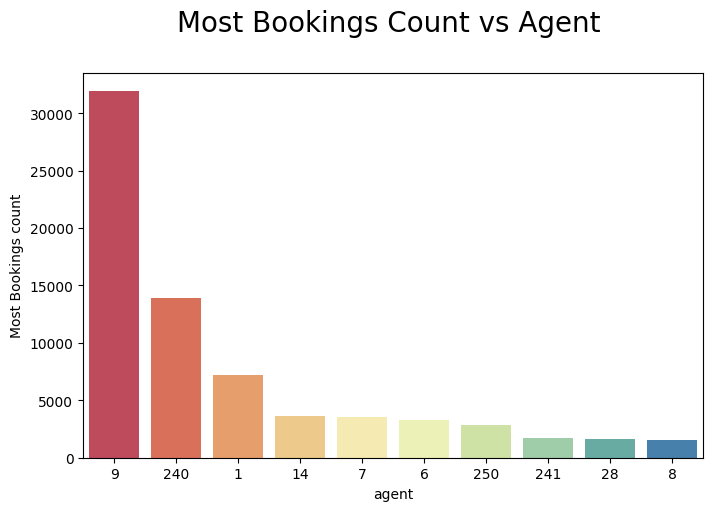

In [ ]:
#ploting bar 
plt.figure(figsize = (8,5))
sns.barplot(x =top_ten_highest_bookings['agent'], y =top_ten_highest_bookings['Most Bookings count'],palette='Spectral',order=top_ten_highest_bookings['agent'])
plt.title('Most Bookings Count vs Agent ',loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observations:-
Agent number 9 made the most booking more than 25k.

###Q4]From which country the most guests are coming?

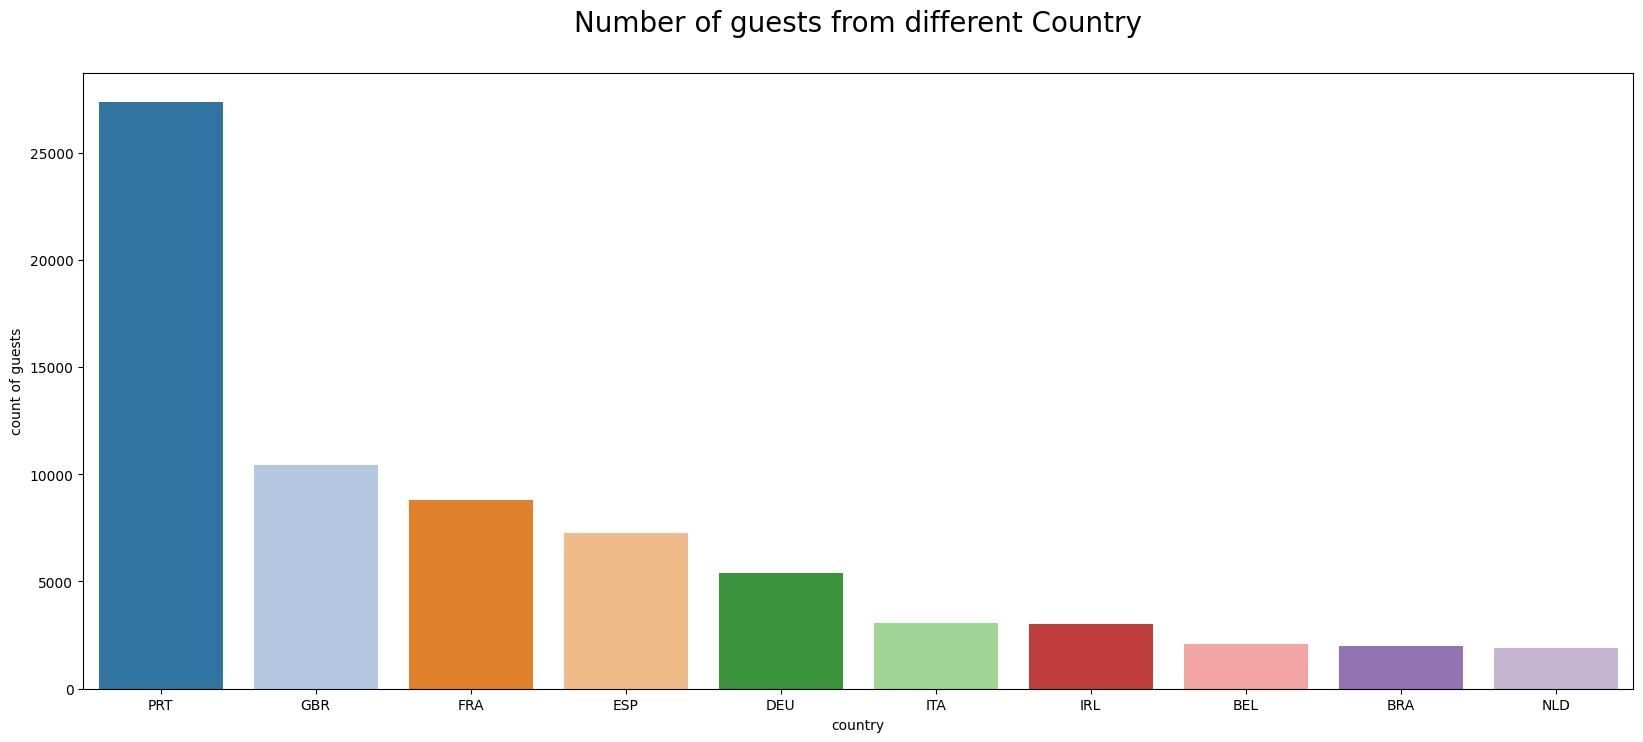

In [ ]:
country_df = df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(20, 8))
sns.barplot(x=country_df['country'], y=country_df['count of guests'],palette='tab20')
plt.title("Number of guests from different Country",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

### Observation:-
People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

###Q5] Which meal type is most preffered meal of customers?

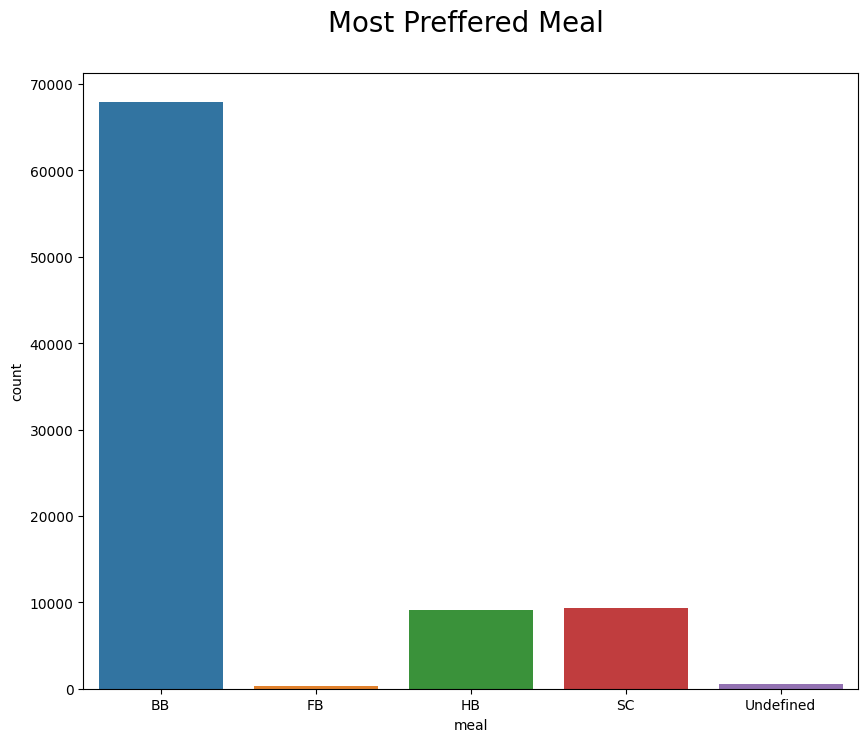

In [ ]:
plt.figure( figsize=(10, 8))
sns.countplot(x = df['meal'],palette='tab10')
plt.title("Most Preffered Meal ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Most preferred meal type is BB (Bed and breakfast).

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

###Q6]-Which room type is in most demand?



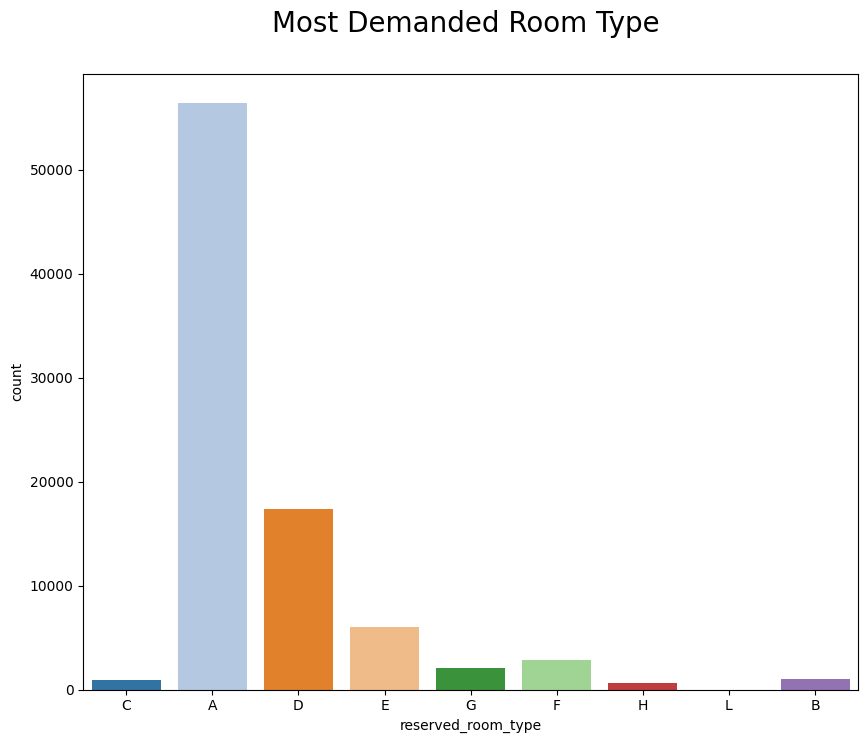

In [ ]:
#most reserved room type
plt.figure( figsize=(10, 8))
sns.countplot(x= df['reserved_room_type'],palette='tab20')
plt.title("Most Demanded Room Type ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Most demanded room type is A.

###Q7]What is the Percentage of repeated guests?

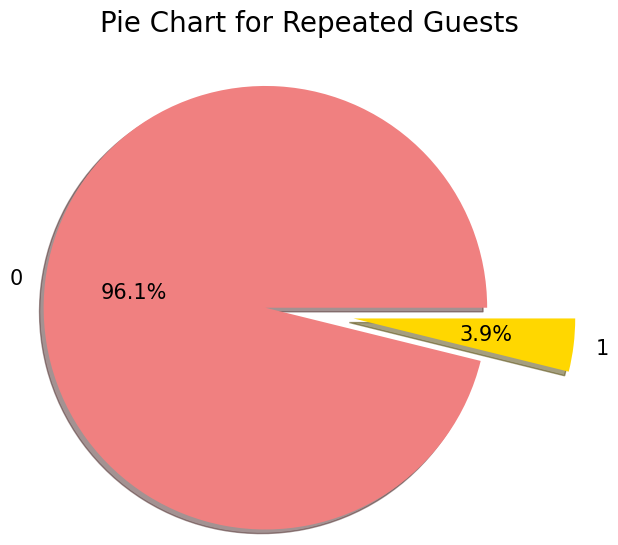

In [ ]:
plt.pie(df['is_repeated_guest'].value_counts(),labels=df['is_repeated_guest'].value_counts().index.tolist(),explode=[0.3, 0.3], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart for Repeated Guests',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Only 3.86% guests are  repeated and remaining are new guests.

In order to retained the guests provide good hospitality, take feedbacks, and try imporve the services as per requirments.  

###8]What is the percentage distribution of required_car_parking_spaces?

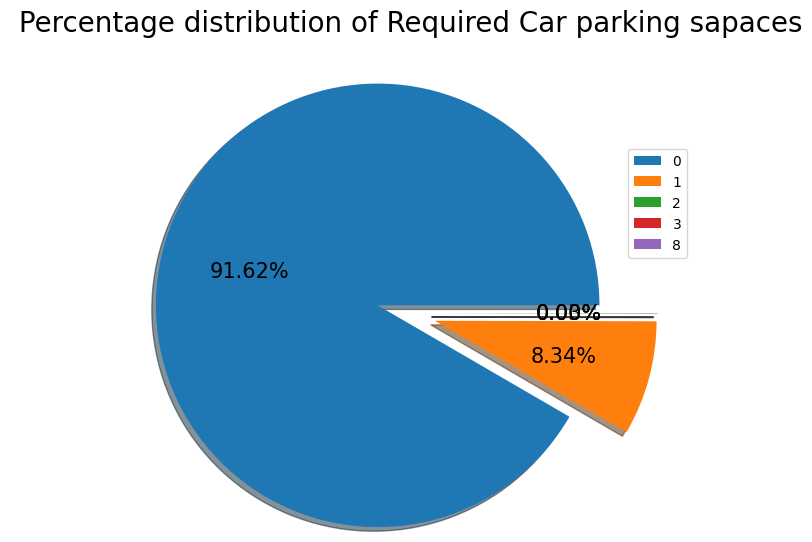

In [ ]:
plt.pie(df['required_car_parking_spaces'].value_counts(),explode=[0.2]*5, autopct='%1.2f%%', shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title(' Percentage distribution of Required Car parking sapaces',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.legend(loc=(1.1,.65), labels=df['required_car_parking_spaces'].value_counts().index.tolist())
plt.show()

###Observation
91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

###9]Which year has the most bookings done?

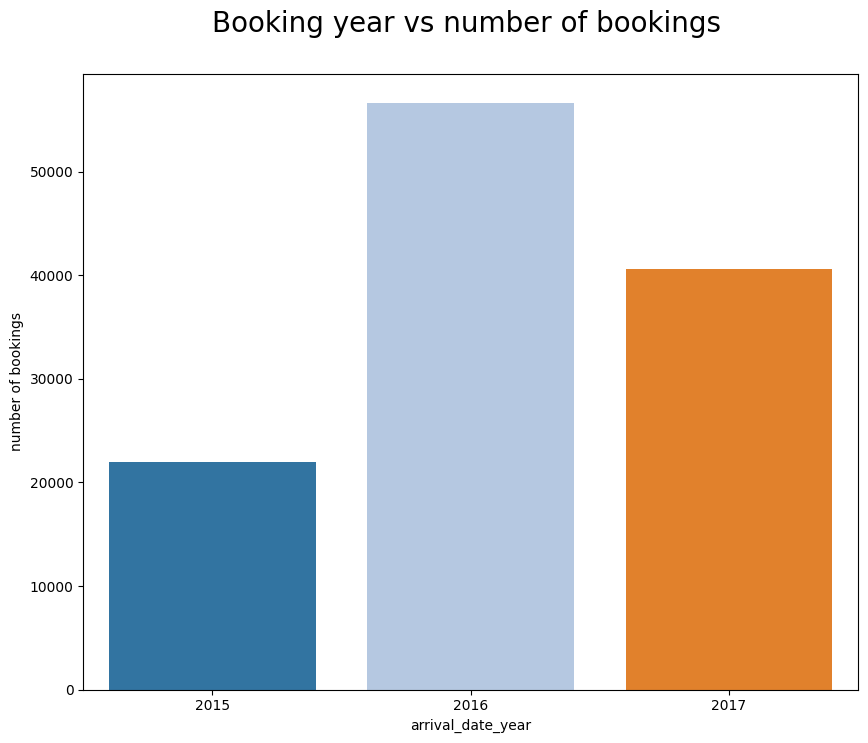

In [ ]:
plt.figure( figsize=(10, 8))
sns.countplot(x= df['arrival_date_year'],palette='tab20')
plt.title("Booking year vs number of bookings ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel("number of bookings")
plt.show()




###Observation:

2016 Year has the most  bookings 40k

2015 has less than 15k bookings

###10]Percentage distribution channel

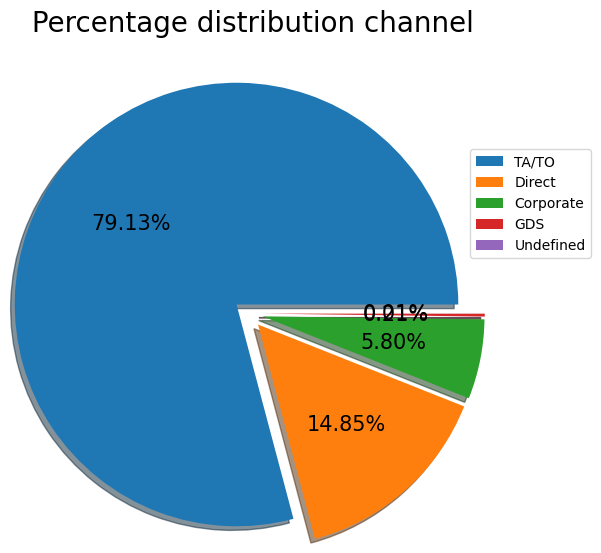

In [ ]:
plt.pie(df['distribution_channel'].value_counts(),explode=[0.1]*5, autopct='%1.2f%%', shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title(' Percentage distribution channel',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.legend(loc=(1.1,.65), labels=df['distribution_channel'].value_counts().index.tolist())
plt.show()

###Observations
79% distribution channel is TA/TO

In [ ]:
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


###11]which is the most preferred market segment?

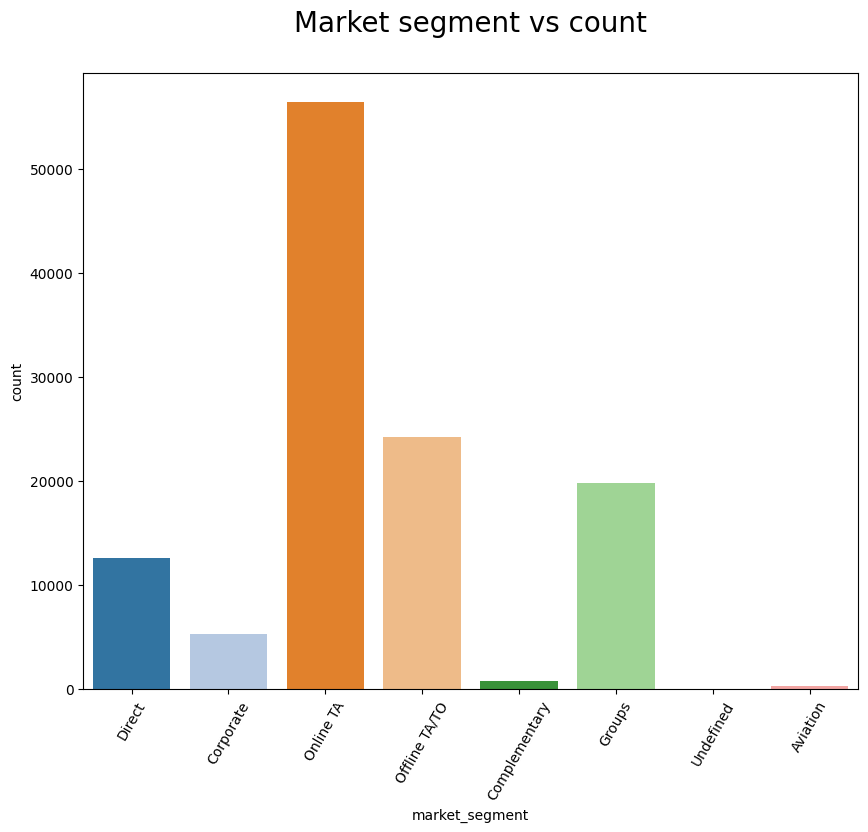

In [ ]:
plt.figure( figsize=(10, 8))
sns.countplot(x= df['market_segment'],palette='tab20')
plt.title("Market segment vs count",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xticks(rotation=60)
plt.show()




###Observation
 Most of the market segment used Online TA.

###12]Percentage distribution of Deposit type

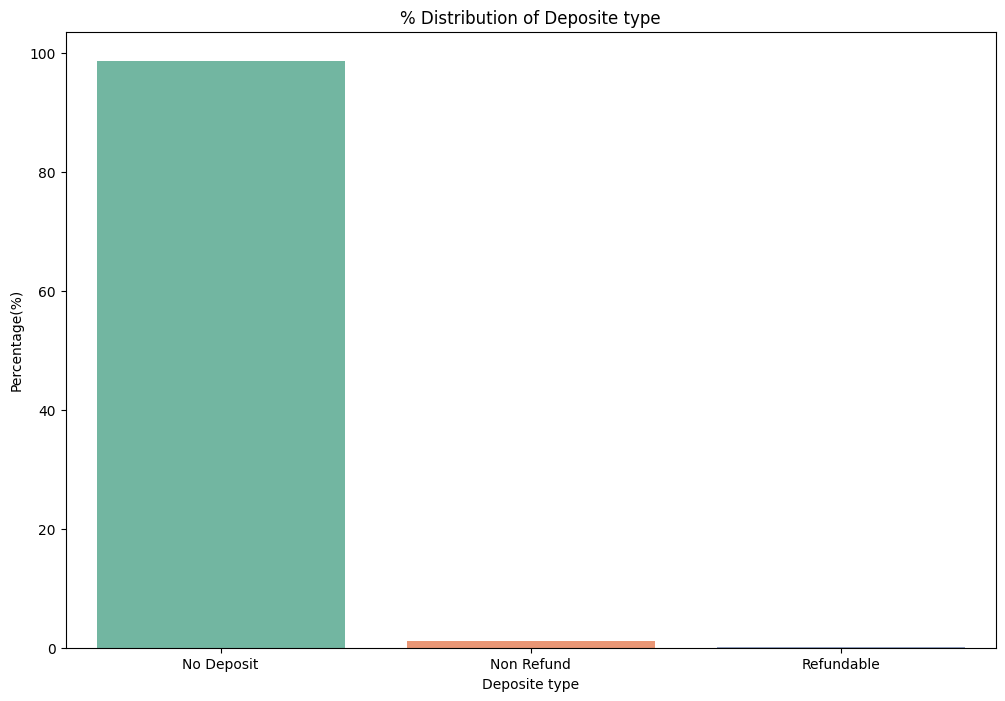

In [ ]:
#percentage of deposite type calculations
deposit_df=df['deposit_type'].value_counts().reset_index().rename(columns={'index': "type",'deposit_type':'Counts'})
plt.figure(figsize=(12,8))
sns.barplot(x=deposit_df['type'],y=deposit_df['Counts']*100/df.shape[0],palette='Set2')
plt.title("% Distribution of Deposite type")
plt.xlabel('Deposite type')
plt.ylabel('Percentage(%)')
plt.show()

###Observations
 Almost 98 % of the guests prefer "No deposit" type of deposit so more chances of booking cancelation.


###13]What is the percentage of booking cancelation?

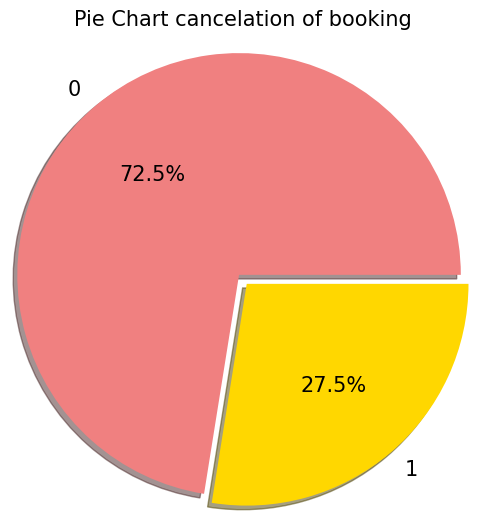

In [ ]:
plt.pie(df['is_canceled'].value_counts(),labels=df['is_canceled'].value_counts().index.tolist(),explode=[0.04, 0.04], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart cancelation of booking',loc='center',pad=50,fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.show()

###Observation
0 means no cancelation of booking ,It is 72.5%.

1 means cancelation of booking,It is 27.5%.